# 데이터 만드는 파일
가정
- 결측치 없음
- column 
    - THK_A : THK사 기기 전류 값[A]
    - TOPS_A : TOPS사 기기 전류 값[A]
    - thick : 도금 두께
- THK, TOPS 두 기기의 전류 값이 동시에 바뀔 수 없음 
- 도금 순서
    1. core __양면 도금__ -> HTK 사라고 가정
    2. 접착제 바르고
    3. 또 __양면 도금__ -> TOPS 사라고 가정  
    
-> 해당 과정을 거쳤을 떄 두께가 너무 두꺼워도, 너무 얇아도 안됨. 그래서 1에서 너무 두껍다면 3에서 얇게 도금될 필요가 있음 

In [45]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [46]:
# dataframe 생성 
DF = pd.DataFrame(columns=["THK_A", "TOP_A", "thick1", "thick2"])
line_num = 1000 # data 몇줄할까...

DF

,THK_A,TOP_A,thick1,thick2


In [47]:
# 걍 시리즈/리스트로 하고 나중에 합치는 것이 나아 보입니다....
thk_list = []
tops_list = []
thick_list1 = [] # 1차 도금
thick_list2 = [] # 2차 도금 

# 두께 최대 최소
total_thick = 6 # 이건 그냥 가정 
thick_max = 4 # 단위 : 마이크로
thick_min = 2

# 전류값 최대 최소
A_min_max = (28, 30) # 단위 : 암페아

# 각 데이터 default 설정(최초 시작값)
thk_A = 30 # A
tops_A = 30 # A
thick = thick_min # 두께 최저에서 시작 
current = 0 # 0=thk, 1=tops
flag = 1 # 0=down, 1=up
sign = [-1, 1]

maintain_s = 5 # 유지할 초 수 default
s_cnt = 0

for line in range(line_num):
    if s_cnt == maintain_s:
        # 똑같아지면 flag에 따라 증가 혹은 감소
        thick += (sign[flag] * random.uniform(0.3, 0.6))
        maintain_s = random.randrange(2,15) # 몇 초 지속할지 [a, b)
        # print(f"========================= {maintain_s}")
        s_cnt = 1
    else:
        # s_cnt가 maintain 시간을 못채우면 +1 증가
        s_cnt += 1
        
    if thick <= thick_min:
        thick = thick_min
        flag = 1 # 증가 시켜야함
    elif thick >= thick_max:
        thick = thick_max
        flag = 0 # 감소 시켜야함 

    # print(s_cnt)

    thick_list1.append(thick) # 현재 두께 저장
    thick_list2.append(total_thick-thick)
    thk_list.append(A_min_max[flag] * 1000) # 현재 thk사 기기의 전류 -> 찬혁 연구원님 : mA로 하자
    tops_list.append(A_min_max[flag-1]) # 현재 tops사 기기의 전류
    
print(thick_list1)

[2, 2, 2, 2, 2, 2.543134658024141, 2.543134658024141, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.1332716846099578, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.6166798258207917, 3.9750767198796533, 3.9750767198796533, 3.9750767198796533, 3.9750767198796533, 3.9750767198796533, 3.9750767198796533, 3.9750767198796533, 3.9750767198796533, 3.9750767198796533, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937, 3.6023153058366937,

# 그래프 그리기

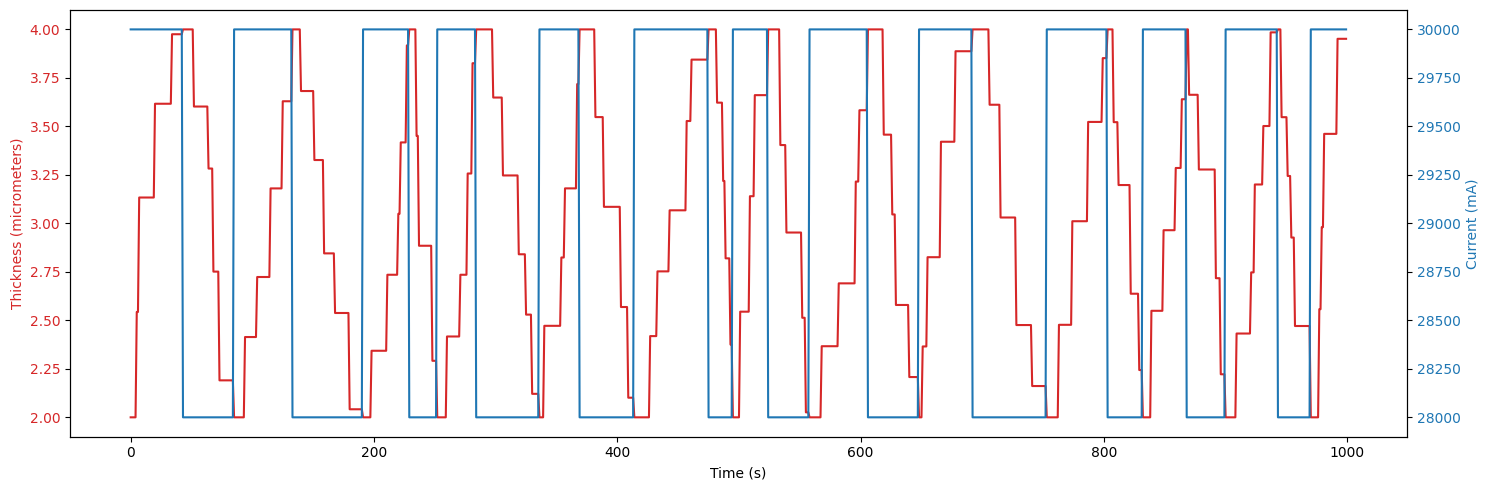

In [48]:
# 1차 도금 처음 그림판에 그렸던 형태로 잘 구현됐는지 
fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Thickness (micrometers)', color=color)
ax1.plot(thick_list1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Current (mA)', color=color)
ax2.plot(thk_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

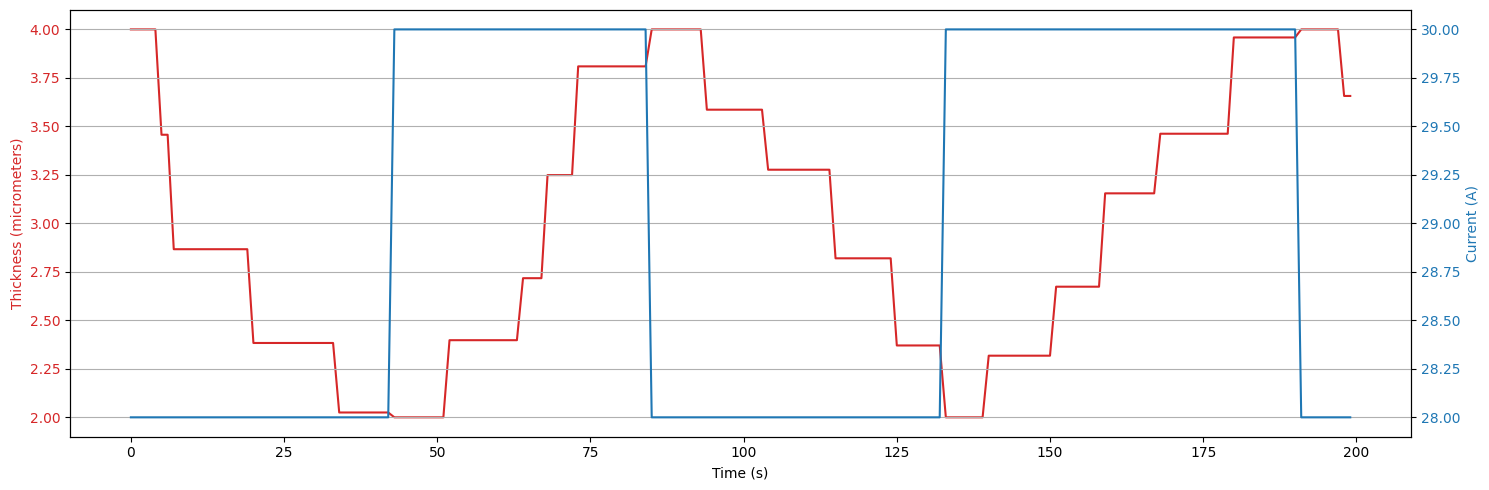

In [49]:
# 2차 도금 처음 그림판에 그렸던 형태로 잘 구현됐는지 
fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Thickness (micrometers)', color=color)
ax1.plot(thick_list2[:200], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Current (A)', color=color)
ax2.plot(tops_list[:200], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.grid()
plt.show()

In [50]:
# thick_list1 + thick_list2 -> element wise sum 
# total 두께 잘 맞추고 있는지 확인
[sum(x) for x in zip(thick_list1, thick_list2)]

[6,
 6,
 6,
 6,
 6,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0

In [51]:
# 두께 그래프 그리기
import plotly.graph_objects as go
opacity = 1
def draw_side_view(idx, thick_list1, thick_list2):
    # Plotly 그래프 그리기
    y_center = 30
    core_thick = 10
    thick1 = thick_list1[idx]  # 동도금 1차 두께
    thick2 = thick_list2[idx]  # 동도금 2차 두께

    fig = go.Figure()

    # y축 범위 채우기 (core층 및 접착제 회색, 도금 부분 황금색)
    top = y_center + core_thick
    bottom = y_center - core_thick

    # core부
    fig.add_shape(type="rect", x0=0, x1=line_num, y0=bottom, y1=top,
                  fillcolor="black", opacity=opacity, line_width=0)

    # 1차 도금 -> 노랑
    fig.add_shape(type="rect", x0=0, x1=line_num, y0=top, y1=top + thick1,
                  fillcolor="yellow", opacity=opacity, line_width=0)

    fig.add_shape(type="rect", x0=0, x1=line_num, y0=bottom - thick1, y1=bottom,
                  fillcolor="yellow", opacity=opacity, line_width=0)
    top = y_center + core_thick + thick1
    bottom = y_center - core_thick - thick1

    # 접착제부
    fig.add_shape(type="rect", x0=0, x1=line_num, y0=top, y1=top + core_thick,
                  fillcolor="lightgray", opacity=opacity, line_width=0)
    fig.add_shape(type="rect", x0=0, x1=line_num, y0=bottom - core_thick, y1=bottom,
                  fillcolor="lightgray", opacity=opacity, line_width=0)
    top += core_thick
    bottom -= core_thick

    # 2차 도금 -> 노랑
    fig.add_shape(type="rect", x0=0, x1=line_num, y0=top, y1=top + thick2,
                  fillcolor="yellow", opacity=opacity, line_width=0)

    fig.add_shape(type="rect", x0=0, x1=line_num, y0=bottom - thick2, y1=bottom,
                  fillcolor="yellow", opacity=opacity, line_width=0)
    top = y_center + core_thick + thick2
    bottom = y_center - core_thick - thick2

    # 레이아웃 설정
    fig.update_layout(
        xaxis=dict(
            showticklabels=False,  # x축 숫자 숨기기
            showgrid=False,        # 그리드 숨기기
            zeroline=False
        ),
        yaxis=dict(
            title='Thickness (micrometers)',
            range=[0, 70],
            showgrid=True,        # y축 그리드 숨기기
        ),
        template='plotly_white'
    )

    # 그래프 표시
    fig.show()


for i in range(0, 1000, 100):
    draw_side_view(i, thick_list1, thick_list2)


# 데이터 -> csv

In [53]:
# dataframe 생성 
data = {
    "THK_A": thk_list,
    "TOP_A": tops_list,
    "thick1": thick_list1,
    "thick2": thick_list2
}

# DF = pd.DataFrame(data)
# DF.to_csv('./data/sample.csv', index=False)
# DF

,THK_A,TOP_A,thick1,thick2
0,30000,28,2.000000,4.000000
1,30000,28,2.000000,4.000000
2,30000,28,2.000000,4.000000
3,30000,28,2.000000,4.000000
4,30000,28,2.000000,4.000000
...,...,...,...,...
995,30000,28,3.951483,2.048517
996,30000,28,3.951483,2.048517
997,30000,28,3.951483,2.048517
998,30000,28,3.951483,2.048517
